In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import numpy as np
from caits.loading import wav_specs_check
from caits.visualization import plot_signal, plot_simple_spectrogram, export_fig
from caits.fe import stft, amplitude_to_db, power_to_db
from utils import load_wav_instance

In [3]:
audio = load_wav_instance(path="data/yes.wav", return_vector=True)

1


In [4]:
# Load audio file
y = audio["signal"]
sr = audio["sr"]
print(f"y: {y.shape}, sr: {sr}")

y: (16000,), sr: 16000


In [5]:
audio_params = wav_specs_check("data/yes.wav")
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

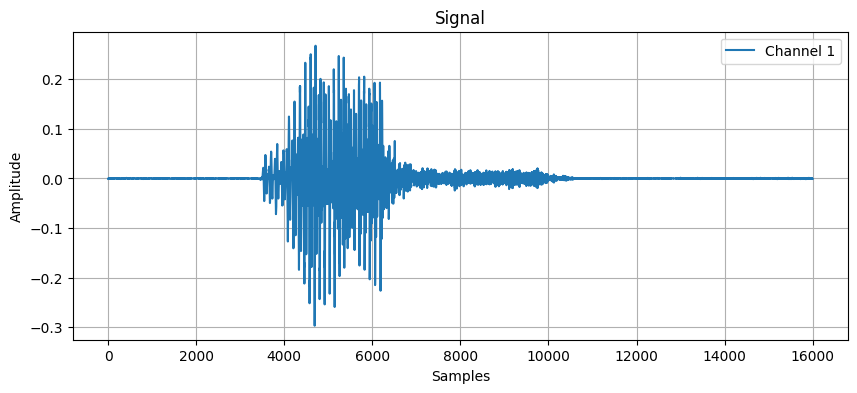

In [6]:
plot_signal(y, sr, return_mode=False)

# Definitions

In [7]:
FRAME_SIZE = 2048
HOP_LENGTH = 128
N_MELS = 128
LOWER_FREQ = 80
UPPER_FREQ = 1000

# Spectrogram

In [8]:
# Compute the short-time Fourier transform (STFT) of the audio signal
D = stft(y, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [9]:
D.shape

(1025, 126)

In [10]:
S_db = amplitude_to_db(np.abs(D), ref=np.max)

In [11]:
S_db.shape

(1025, 126)

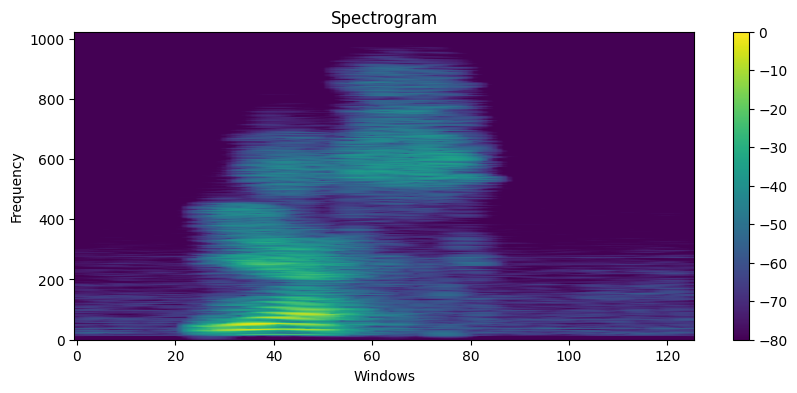

In [12]:
plot_simple_spectrogram(S_db)

In [13]:
S_pow = power_to_db(np.abs(D))

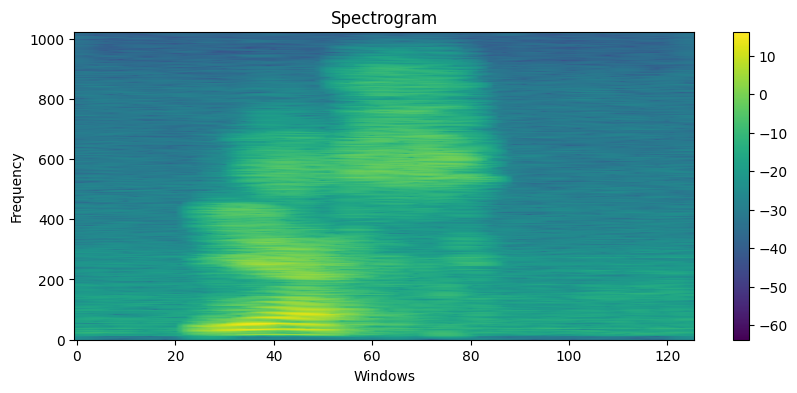

In [14]:
plot_simple_spectrogram(S_pow)

# dB-scaled Spectrogram with time and sample axis

In [15]:
from caits.convert import times_like, samples_like
from caits.fe import fft_frequencies
from caits.visualization import plot_spectrogram

# Time axis
times = times_like(S_db, sr=sr, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Sample axis
samples = samples_like(S_db, hop_length=HOP_LENGTH, n_fft=FRAME_SIZE)
# Frequency axis
frequencies = fft_frequencies(sr=sr, n_fft=FRAME_SIZE)

In [16]:
type(times), type(frequencies)

(numpy.ndarray, numpy.ndarray)

In [17]:
times.shape

(126,)

In [18]:
frequencies.shape

(1025,)

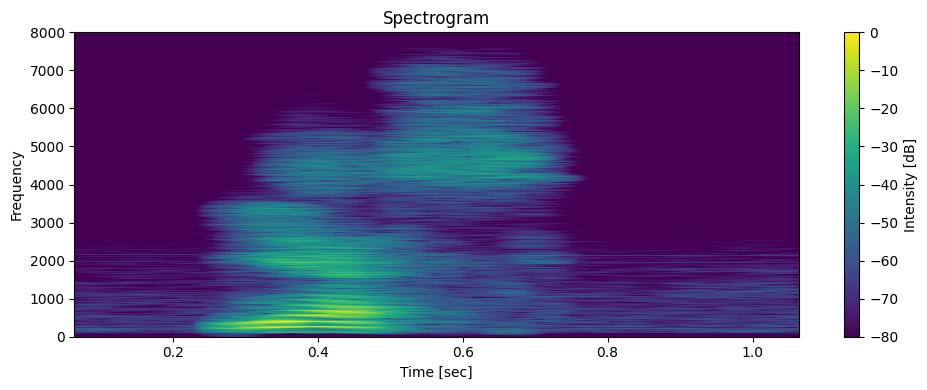

In [19]:
fig_spec_db_times = plot_spectrogram(
    f=frequencies,
    x=times,
    spec=S_db,
    x_axis_name="time",
    return_mode=True
)

export_fig(fig_spec_db_times, export="show")

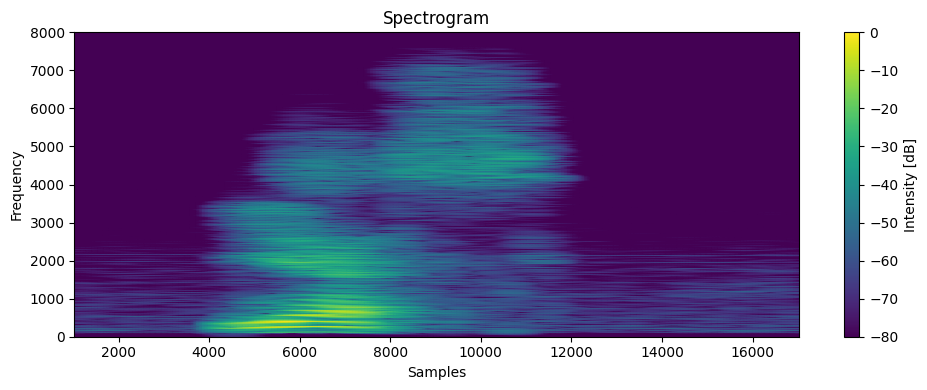

In [20]:
fig_spec_db_samples = plot_spectrogram(
    f=frequencies,
    x=samples,
    spec=S_db,
    x_axis_name="samples",
    return_mode=True
)

export_fig(fig_spec_db_samples, export="show")


In [21]:
export_fig(
    fig_spec_db_samples,
    export="save",
    save_path="data",
    fig_id="fig_spec_db_samples",
    fig_extension="png",
    create_dir=True,
    print_debug=True
)

Figure saved to data/fig_spec_db_samples.png
